In [3]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.8/208.8 MB 6.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 2.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 6.6 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 6.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.9/393.9 kB 4.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 5.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 7.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 6.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 5.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [59]:
import tensorflow as tf
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

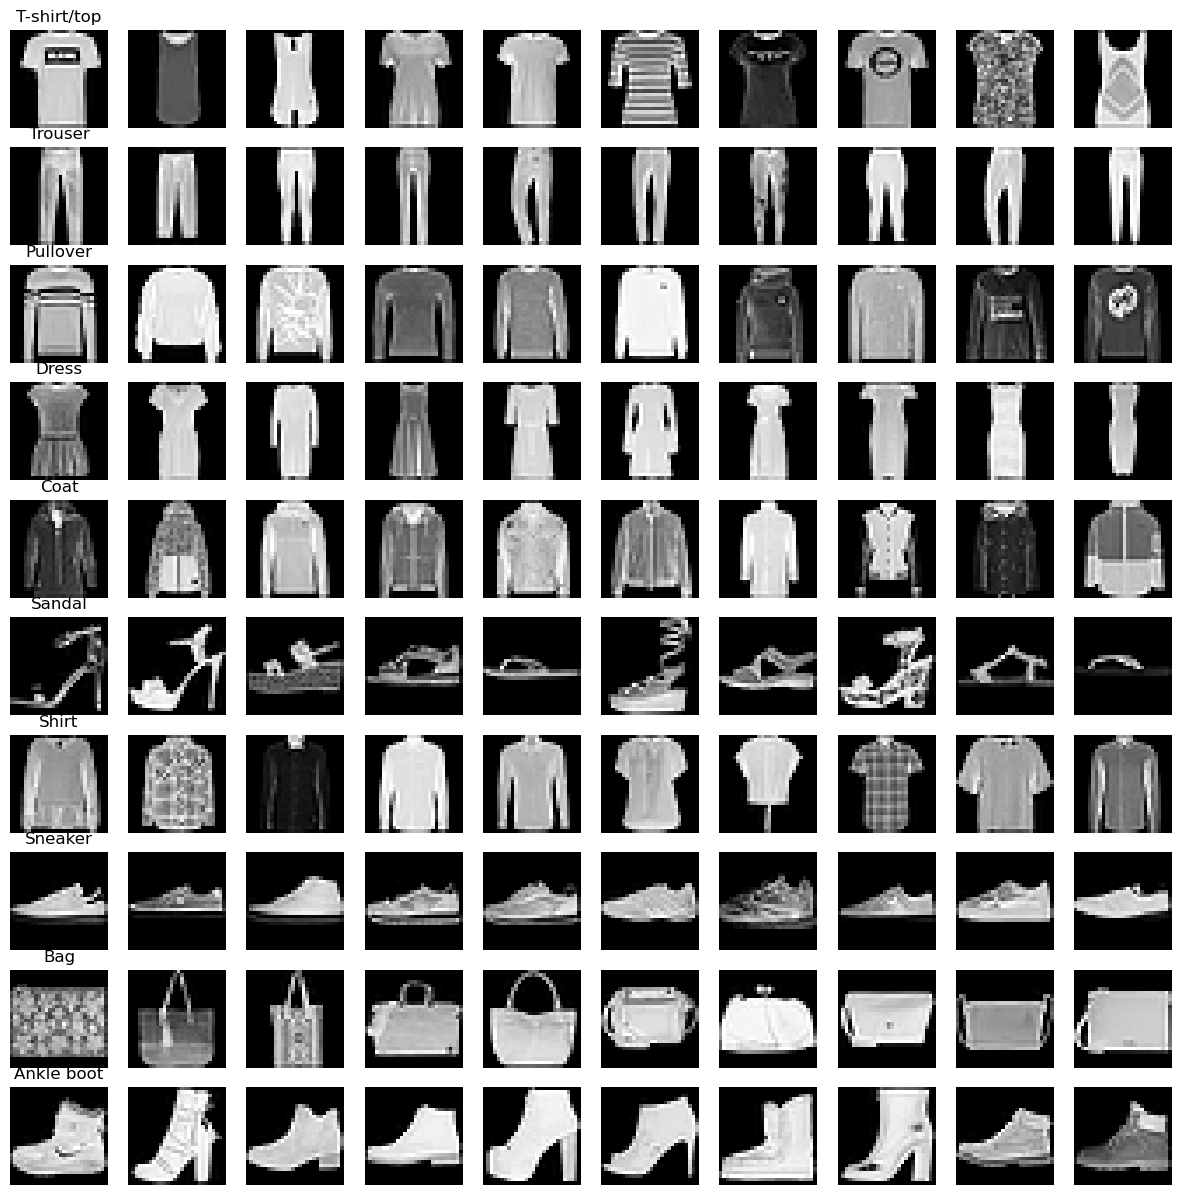

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Load Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (_, _) = fashion_mnist.load_data()

# Class labels
class_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Display 10 representative images from each class
plt.figure(figsize=(15, 15))

for i in range(10):
    class_indices = [idx for idx, label in enumerate(train_labels) if label == i][:10]  # Get indices of the first 10 instances for each class
    for j, idx in enumerate(class_indices):
        plt.subplot(10, 10, i * 10 + j + 1)
        plt.imshow(train_images[idx], cmap='gray')
        plt.axis('off')
        if j == 0:
            plt.title(class_labels[i])

plt.show()

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train = train_images.reshape(train_images.shape[0], -1)
test_images_flat = test_images.reshape(test_images.shape[0], -1)

x_train, x_test, y_train, y_test = train_test_split(train_images_flat, train_labels, test_size=0.2, random_state=0)

logisticReg = LogisticRegression(max_iter=500)
logisticReg.fit(x_train, y_train)


/Users/jonathankim/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [73]:
log_predictions = logisticReg.predict(x_test)
log_score = logisticReg.score(x_test, y_test)
print(log_score)

0.84425


In [92]:
from sklearn.neighbors import KNeighborsClassifier
import time

In [105]:
knn_classifier = KNeighborsClassifier(n_neighbors=1)

# knn_predictions = knn_classifier.predict(x_test)
t0 = time.time()
knn_classifier.fit(x_train, y_train)
run_time = time.time() - t0
print("K = 1 Run Time: %.4f" % run_time)
knn_score = knn_classifier.score(x_test, y_test)
print("K = 1 KNN Score: %.4f" % knn_score)

K = 1 Run Time: 0.0280
K = 1 KNN Score: 0.8431


In [103]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# knn_predictions = knn_classifier.predict(x_test)
t0 = time.time()
knn_classifier.fit(x_train, y_train)
run_time = time.time() - t0
print("K = 3 Run Time: %.4f" % run_time)

knn_score = knn_classifier.score(x_test, y_test)
print("K = 3 KNN Score: %.4f" % knn_score)

K = 3 Run Time: 0.0276
K = 3 KNN Score: 0.8530


In [106]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# knn_predictions = knn_classifier.predict(x_test)
t0 = time.time()
knn_classifier.fit(x_train, y_train)
run_time = time.time() - t0
print("K = 5 Run Time: %.4f" % run_time)

knn_score = knn_classifier.score(x_test, y_test)
print("K = 5 KNN Score: %.4f" % knn_score)

K = 5 Run Time: 0.0281
K = 5 KNN Score: 0.8563


In [107]:
knn_classifier = KNeighborsClassifier(n_neighbors=7)

# knn_predictions = knn_classifier.predict(x_test)
t0 = time.time()
knn_classifier.fit(x_train, y_train)
run_time = time.time() - t0
print("K = 7 Run Time: %.4f" % run_time)
knn_score = knn_classifier.score(x_test, y_test)
print("K = 7 KNN Score: %.4f" % knn_score)

K = 7 Run Time: 0.0301
K = 7 KNN Score: 0.8521


In [109]:
clf = LogisticRegression(C = 0.001, solver='lbfgs', tol=0.1)
t0 = time.time()
clf.fit(x_train, y_train)
run_time = time.time() - t0
print(run_time)
score = clf.score(x_test, y_test)
print("Test score = %.4f" % score)

10.62718915939331
Test score = 0.8518


/Users/jonathankim/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [110]:
clf = LogisticRegression(C = 0.01, solver='lbfgs', tol=0.1)
t0 = time.time()
clf.fit(x_train, y_train)
run_time = time.time() - t0
print(run_time)
score = clf.score(x_test, y_test)
print("Test score = %.4f" % score)

10.495522737503052
Test score = 0.8564


/Users/jonathankim/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [111]:
clf = LogisticRegression(C = 0.1, solver='lbfgs', tol=0.1)
t0 = time.time()
clf.fit(x_train, y_train)
run_time = time.time() - t0
print(run_time)
score = clf.score(x_test, y_test)
print("Test score = %.4f" % score)

10.283728122711182
Test score = 0.8528


/Users/jonathankim/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [112]:
clf = LogisticRegression(C = 0.01, solver='lbfgs', tol=0.01)
t0 = time.time()
clf.fit(x_train, y_train)
run_time = time.time() - t0
print(run_time)
score = clf.score(x_test, y_test)
print("Test score = %.4f" % score)

11.480066061019897
Test score = 0.8564


/Users/jonathankim/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [113]:
clf = LogisticRegression(C = 0.01, solver='lbfgs', tol=0.001)
t0 = time.time()
clf.fit(x_train, y_train)
run_time = time.time() - t0
print(run_time)
score = clf.score(x_test, y_test)
print("Test score = %.4f" % score)

10.570034980773926
Test score = 0.8564


/Users/jonathankim/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# For KNN optimal number of neighbors is 5

# This is because 1, 3, 5, 7 number of neighbors all have 
# very similar run times but 5 has the highest score

# For Logistic Regression, optimal C is 0.01 and tol is 0.001

# This is because 0.001, 0.01, and 0.1 all have similar run times 
# but 0.01 has the highest score
# For tol, 0.01 and 0.001 have the highest scores but 0.01 has a 
# faster run time.